# Basic isoprenol analysis

Make some basic plots for isoprenol comparison across DBTL cycles.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
isoprenol_files = [f'dbtl{i}_isoprenol.pkl' for i in [0, 1, 2, 3, 4, 5]]
df_list = [pd.read_pickle(f) for f in isoprenol_files]
for i, df in enumerate(df_list):
    df['cycle'] = i

df_all = pd.concat(df_list).reset_index(drop = True)
df_all.head(3)
df_all['is_control'] = df_all['Line Name'].apply(lambda x: 'ontrol' in x)


In [3]:
df_all.columns

Index(['Study ID', 'Study Name', 'Line ID', 'Replicate Key', 'Line Name',
       'Line Description', 'Protocol', 'Assay ID', 'Assay Name', 'Formal Type',
       'Measurement Type', 'Compartment', 'Units', 'Value', 'Hours', 'cycle',
       'is_control'],
      dtype='object')

/tmp/ipykernel_4278/4290417705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,3]) & (~df_all['is_control'])),:],
/tmp/ipykernel_4278/4290417705.py:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,3]) & (~df_all['is_control'])),:],


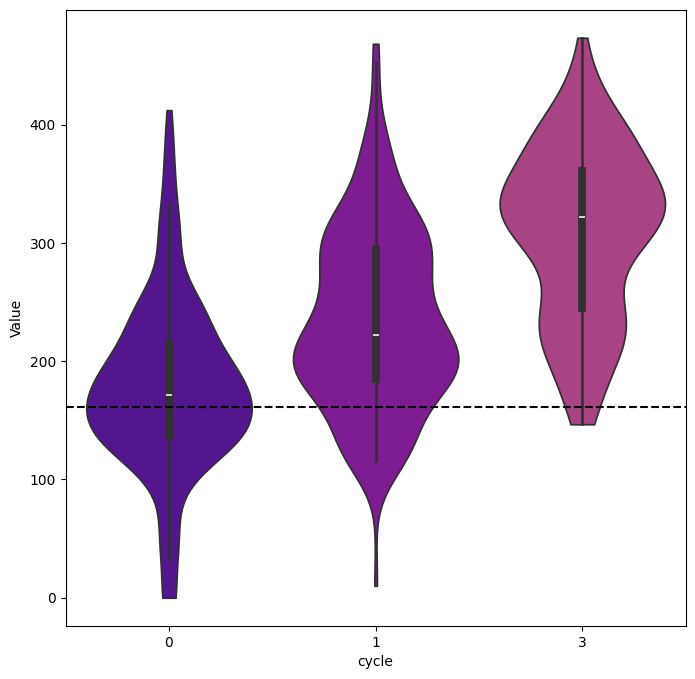

In [4]:
fig, ax = plt.subplots(figsize = (8,8))
sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,3]) & (~df_all['is_control'])),:],
               x = 'cycle',
               y = 'Value',
               cut = 0,
               palette= sns.color_palette('plasma'),
              ax = ax)

control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axhline(control_mean_all, c='k', linestyle = '--')
fig.savefig('dbtl0_1_3_violin_compare.pdf')

/tmp/ipykernel_4278/3616579099.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4, 5]) & (~df_all['is_control'])),:],


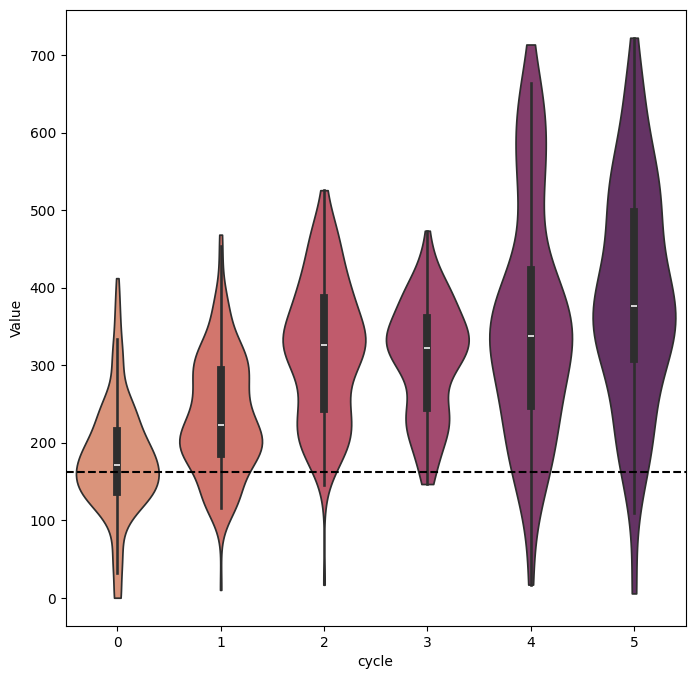

In [5]:
fig, ax = plt.subplots(figsize = (8,8))
sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4, 5]) & (~df_all['is_control'])),:],
               x = 'cycle',
               y = 'Value',
               cut = 0,
               palette= sns.color_palette('flare'),
               ax = ax
              )

control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axhline(control_mean_all, c='k', linestyle = '--')
fig.savefig('dbtl0_1_2_3_4_5_violin_compare.pdf')
fig.savefig('dbtl0_1_2_3_4_5_violin_compare.png')

/tmp/ipykernel_4278/213437460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4, 5]) & (~df_all['is_control'])),:],


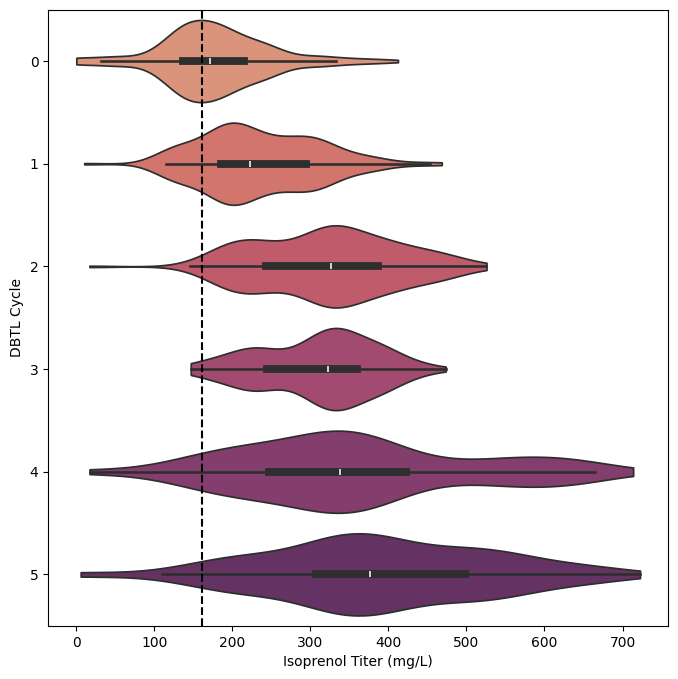

In [6]:
fig, ax = plt.subplots(figsize = (8,8))
sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4, 5]) & (~df_all['is_control'])),:],
               y = 'cycle',
               x = 'Value',
               cut = 0,
               palette= sns.color_palette('flare'),
               orient = 'h',
               ax = ax
              )

control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axvline(control_mean_all, c='k', linestyle = '--')
ax.set_xlabel('Isoprenol Titer (mg/L)')
ax.set_ylabel('DBTL Cycle')
fig.savefig('dbtl0_1_2_3_4_5_violin_compare_horiz.pdf')
fig.savefig('dbtl0_1_2_3_4_5_violin_compare_horiz.png')

/tmp/ipykernel_4278/2346285959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4, 5]) & (df_all['is_control'])),:],


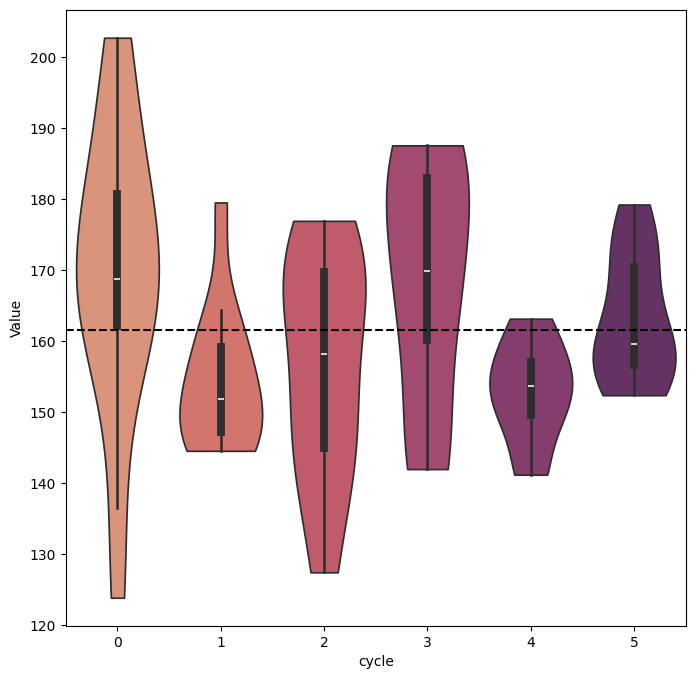

In [7]:
fig, ax = plt.subplots(figsize = (8,8))
sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4, 5]) & (df_all['is_control'])),:],
               x = 'cycle',
               y = 'Value',
               cut = 0,
               palette= sns.color_palette('flare'),
               ax = ax
              )

control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axhline(control_mean_all, c='k', linestyle = '--')
fig.savefig('dbtl0_1_2_3_4_5_CONTROL_violin_compare.pdf')
fig.savefig('dbtl0_1_2_3_4_5_CONTROL_violin_compare.png')

## Make overall figure

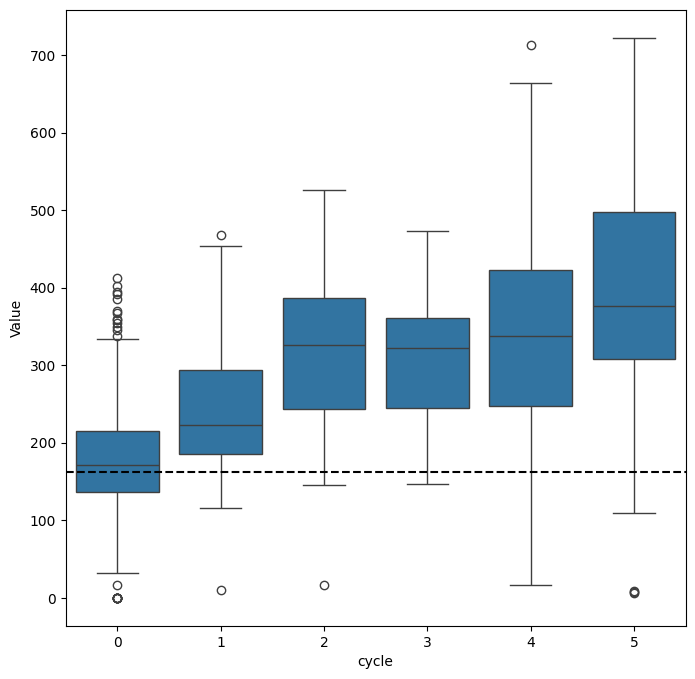

In [8]:
fig, ax = plt.subplots(figsize = (8,8))
sns.boxplot(data = df_all.loc[(~df_all['is_control']),:],
               x = 'cycle',
               y = 'Value',
               ax = ax)

# max_titer_vals = [df_all.loc[df_all['cycle'] == i, 'Value'].max() for i in [0,1,2,3]]
# max_titer_df = df_all.loc[
#     df_all['Value'].isin(max_titer_vals),
#     :
# ]
# sns.lineplot(data = max_titer_df,
#                x = 'cycle',
#                y = 'Value',
#                ax = ax)
control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axhline(control_mean_all, c='k', linestyle = '--')
fig.savefig('all_isoprenol_comparison.png')

## Look at single targets compared to whole distribution

In [10]:
df_all

,Study ID,Study Name,Line ID,Replicate Key,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours,cycle,is_control
0,187352,CORRECTED: CRISPRi automation for enhanced iso...,187360,3475b66f-023e-4334-a86d-374b4094f346,Control-R1,BL1A1_NT,GC-FID,188815,Control-R1,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,177.33700,24.0,0,True
1,187352,CORRECTED: CRISPRi automation for enhanced iso...,187368,0445a7bc-3aaf-401a-a0c4-e77922997140,Control-R2,BL1B1_NT,GC-FID,188823,Control-R2,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,181.88373,24.0,0,True
2,187352,CORRECTED: CRISPRi automation for enhanced iso...,187376,086e7c52-b5ac-42ca-81d1-e170b23b37fc,Control-R3,BL1C1_NT,GC-FID,188831,Control-R3,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,169.40580,24.0,0,True
3,187352,CORRECTED: CRISPRi automation for enhanced iso...,187408,8d8b104b-b36a-4c30-b5d9-1449e73fb218,Control-R4,BL2A1_NT,GC-FID,188863,Control-R4,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,161.67620,24.0,0,True
4,187352,CORRECTED: CRISPRi automation for enhanced iso...,187416,63f68f0d-d4a8-4b64-b1ba-8412da15aecb,Control-R5,BL2B1_NT,GC-FID,188871,Control-R5,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,136.42987,24.0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,213389,CRISPRi automation for enhanced isoprenol prod...,213749,d6838476-93a2-4501-b8b3-a4f388763f36,PP_1317_PP_4191-R3,DBTL5_P4_042,GC-FID,214092,PP_1317_PP_4191-R3,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,282.31370,48.0,5,False
1340,213389,CRISPRi automation for enhanced isoprenol prod...,213750,cc252324-9906-4ee2-8eea-62db5dc59f18,PP_0368_PP_0528_PP_0812-R3,DBTL5_P4_043,GC-FID,214093,PP_0368_PP_0528_PP_0812-R3,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,358.04150,48.0,5,False
1341,213389,CRISPRi automation for enhanced isoprenol prod...,213751,169e65a6-0d01-4c84-b4ce-7a32a53d905a,PP_0814_PP_0815_PP_1506-R3,DBTL5_P4_044,GC-FID,214094,PP_0814_PP_0815_PP_1506-R3,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,425.20920,48.0,5,False
1342,213389,CRISPRi automation for enhanced isoprenol prod...,213752,4a4aefd5-c3e6-4007-b58a-fddbd29c5fc9,PP_0751_PP_1506-R3,DBTL5_P4_045,GC-FID,214095,PP_0751_PP_1506-R3,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,176.83820,48.0,5,False


In [20]:
def make_target_compare_df(df, target, column_to_add = None):
    df_target = df.copy()
    if column_to_add is None:
        column_to_add = f'contains_{target}'
    df_target[column_to_add] = df_target['Line Name'].apply(
        lambda x: target in x
    )
    return df_target


<Axes: xlabel='Value'>

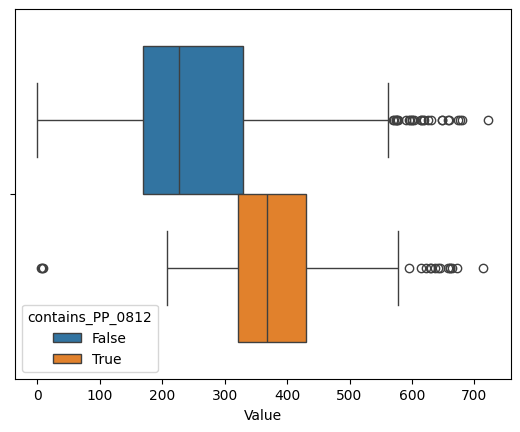

In [21]:
target = 'PP_0812'
df_target = make_target_compare_df(df_all, target)
sns.boxplot(df_target, x = 'Value', hue = f'contains_{target}')

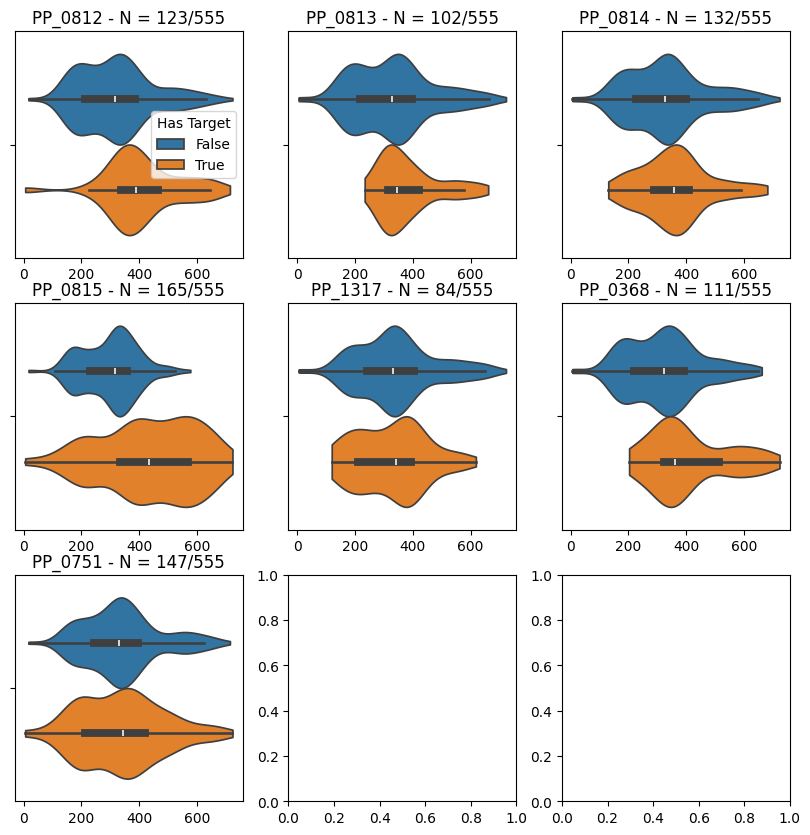

In [29]:
targets = ['PP_0812', 'PP_0813', 'PP_0814', 'PP_0815', 'PP_1317', 'PP_0368', 'PP_0751']
fig, ax = plt.subplots(3,3,figsize = (10,10))
for i, t in enumerate(targets):
    a = fig.get_axes()[i]
    df_target = make_target_compare_df(df_all[df_all.cycle.isin([3,4,5])], t, 'Has Target')
    ax_title = f"{t} - N = {df_target['Has Target'].sum()}/{len(df_target)}"
    if i > 0:
        sns.violinplot(df_target, x = 'Value', hue = f'Has Target', ax = a, legend = None, cut = 0)
    else:
        sns.violinplot(df_target, x = 'Value', hue = f'Has Target', ax = a, cut = 0)

        
    a.set_title(ax_title)
    a.set_xlabel('')
                                              

In [47]:
top_N = 30
top_N_line_name_strings = df_all[df_all['cycle'].isin([3,4,5])].sort_values('Value', ascending = False).head(30)['Line Name'].values
print(top_N_line_name_strings)
top_N_targets = []
for s in top_N_line_name_strings:
    s = s[:-2]
    split_str = s.split('PP_')
    for substring in split_str[1:]:
        top_N_targets.append('PP_' + substring[:-1])
        
top_N_targets = list(set(top_N_targets))

['PP_0368_PP_0751_PP_0815-R1' 'PP_0368_PP_0812_PP_0815-R1'
 'PP_0368_PP_0814_PP_0815-R3' 'PP_0368_PP_0814_PP_0815-R2'
 'PP_0368_PP_0751_PP_0815-R2' 'PP_0368_PP_0751_PP_0812_PP_0815-R1'
 'PP_0368_PP_0812_PP_0815-R3' 'PP_0368_PP_0812_PP_0815-R2'
 'PP_0812_PP_0813_PP_0815-R1' 'PP_0368_PP_0814_PP_0815-R1'
 'PP_0751_PP_0815-R2' 'PP_0368_PP_0751_PP_0812_PP_0815-R2'
 'PP_0814_PP_0815-R1' 'PP_0368_PP_0751_PP_0815-R3'
 'PP_0528_PP_0812_PP_0815-R2' 'PP_0812_PP_0813_PP_0815-R3'
 'PP_0528_PP_0812_PP_0815-R3' 'PP_0812_PP_0813_PP_0815-R2'
 'PP_0751_PP_0815-R3' 'PP_0368_PP_0812_PP_0813_PP_0815-R1'
 'PP_0814_PP_0815-R3' 'PP_0368_PP_0751_PP_0812_PP_0815-R3'
 'PP_0813_PP_0814_PP_0815-R2' 'PP_0437_PP_0815_PP_1317-R3'
 'PP_0751_PP_0815-R1' 'PP_0813_PP_0814_PP_0815-R3'
 'PP_0528_PP_0812_PP_0815-R1' 'PP_0815_PP_2136-R1'
 'PP_0813_PP_0814_PP_0815-R1' 'PP_0368_PP_0815-R1']


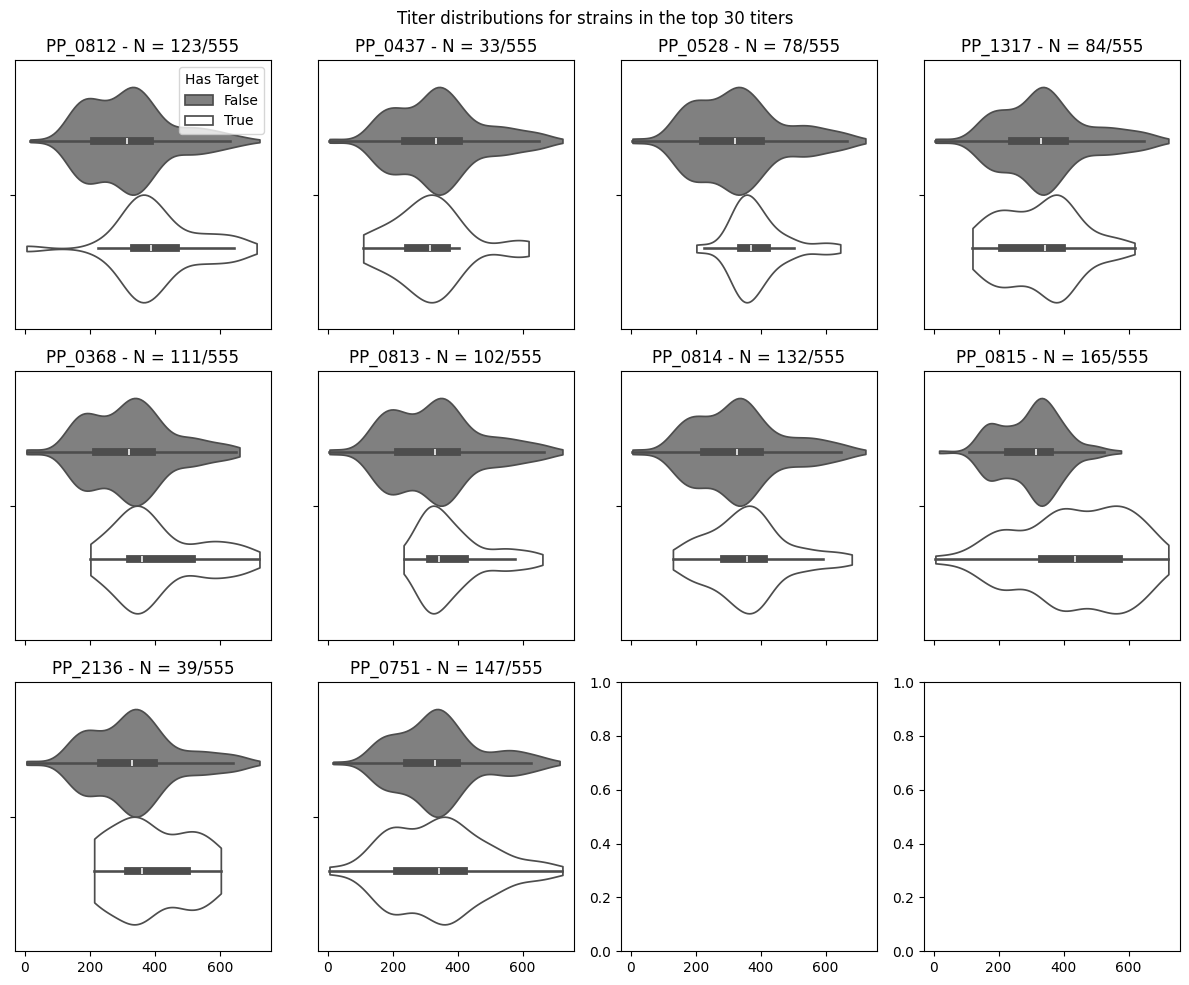

In [65]:
fig, ax = plt.subplots(3,4,figsize = (12,10), sharex = True)
for i, t in enumerate(top_N_targets):
    a = fig.get_axes()[i]
    df_target = make_target_compare_df(df_all[df_all.cycle.isin([3,4,5])], t, 'Has Target')
    ax_title = f"{t} - N = {df_target['Has Target'].sum()}/{len(df_target)}"
    if i > 0:
        sns.violinplot(df_target, x = 'Value', hue = f'Has Target', ax = a, legend = None, cut = 0, palette = ['gray', 'white'])
    else:
        sns.violinplot(df_target, x = 'Value', hue = f'Has Target', ax = a, cut = 0, palette = ['gray', 'white'])

        
    a.set_title(ax_title)
    a.set_xlabel('')
fig.suptitle(f'Titer distributions for strains in the top {top_N} titers')
fig.tight_layout()
                         

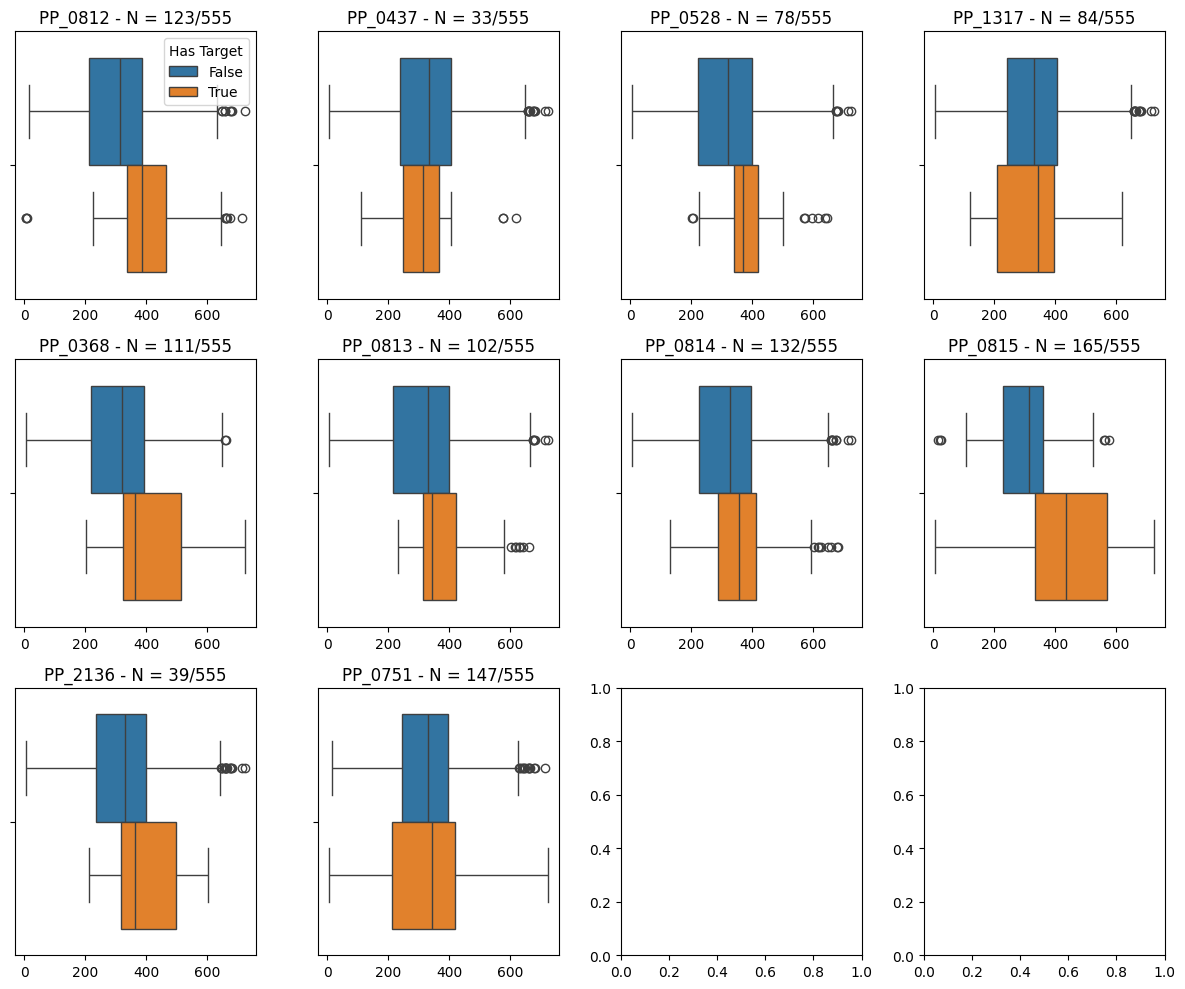

In [61]:
fig, ax = plt.subplots(3,4,figsize = (12,10))
for i, t in enumerate(top_N_targets):
    a = fig.get_axes()[i]
    df_target = make_target_compare_df(df_all[df_all.cycle.isin([3,4,5])], t, 'Has Target')
    ax_title = f"{t} - N = {df_target['Has Target'].sum()}/{len(df_target)}"
    if i > 0:
        sns.boxplot(df_target, x = 'Value', hue = f'Has Target', ax = a, legend = None)
    else:
        sns.boxplot(df_target, x = 'Value', hue = f'Has Target', ax = a)

        
    a.set_title(ax_title)
    a.set_xlabel('')
fig.tight_layout()
                         

In [48]:
top_N_targets

['PP_0812',
 'PP_0437',
 'PP_0528',
 'PP_1317',
 'PP_0368',
 'PP_0813',
 'PP_0814',
 'PP_0815',
 'PP_2136',
 'PP_0751']